In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1

## 로드

In [ ]:
import pandas as pd
import numpy as np

adidas = pd.read_csv('/content/drive/MyDrive/Adidas E-commerce DA/Adidas US Sales Datasets.csv')

Retailer : adidas 브랜드 판매하는 유통처

RetailerID : 위에꺼 점포?

Invoice Date : 판매된 날짜

Region , State , City : 지역

Product : 제품

Product per Unit : 상품 1개당 가격

Units sold : 판매량

Total Sales : 판매금액, 매출액

Operating Profit : 영업이익 (매출액 - 원가)

Operating Margin : 영업마진 (영업이익율)

Sales Method : 판매 채널? 방법? (매장/아울렛/온라인)





In [ ]:
adidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store


In [ ]:
adidas['Sales Method'].unique()

array(['In-store', 'Outlet', 'Online'], dtype=object)

In [ ]:
adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: int64(1), object(12)
memory usage: 980.0+ KB


Retailer object

RetailerID int64 -> 문자 #숫자 자체로 의미 없기 때문

Invoice Date object -> datetime

Region Object

State Object

City Object

Product object

Price per Unit object -> float

Units Sold object -> float

Total Sales object -> float

Operating Profit object -> float

Operating object -> float

Sales Method object

In [ ]:
adidas.head(2)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store


## 전처리

In [ ]:
adidas['Price per Unit'] = adidas['Price per Unit'].str.replace('[%$,]', '', regex=True).astype('float')
adidas['Units Sold'] = adidas['Units Sold'].str.replace('[%$,]', '', regex=True).astype('float')
adidas['Total Sales'] = adidas['Total Sales'].str.replace('[%$,]', '', regex=True).astype('float')
adidas['Operating Profit'] = adidas['Operating Profit'].str.replace('[%$,]', '', regex=True).astype('float')
adidas['Operating Margin'] = adidas['Operating Margin'].str.replace('[%$,]', '', regex=True).astype('float')

In [ ]:
adidas['Operating Margin rate'] = adidas['Operating Margin'] * 0.01

In [ ]:
adidas.head(2)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Operating Margin rate
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50.0,In-store,0.5
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,30.0,In-store,0.3


In [ ]:
adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Retailer               9648 non-null   object 
 1   Retailer ID            9648 non-null   int64  
 2   Invoice Date           9648 non-null   object 
 3   Region                 9648 non-null   object 
 4   State                  9648 non-null   object 
 5   City                   9648 non-null   object 
 6   Product                9648 non-null   object 
 7   Price per Unit         9648 non-null   float64
 8   Units Sold             9648 non-null   float64
 9   Total Sales            9648 non-null   float64
 10  Operating Profit       9648 non-null   float64
 11  Operating Margin       9648 non-null   float64
 12  Sales Method           9648 non-null   object 
 13  Operating Margin rate  9648 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 1.0+ MB

In [ ]:
adidas['Invoice Date'] = pd.to_datetime(adidas['Invoice Date'], format='%Y-%m-%d')
adidas['year'] = adidas['Invoice Date'].dt.year
adidas['month'] = adidas['Invoice Date'].dt.month

In [ ]:
adidas['Retailer ID'] = adidas['Retailer ID'].astype('string')

In [ ]:
adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Retailer               9648 non-null   object        
 1   Retailer ID            9648 non-null   string        
 2   Invoice Date           9648 non-null   datetime64[ns]
 3   Region                 9648 non-null   object        
 4   State                  9648 non-null   object        
 5   City                   9648 non-null   object        
 6   Product                9648 non-null   object        
 7   Price per Unit         9648 non-null   float64       
 8   Units Sold             9648 non-null   float64       
 9   Total Sales            9648 non-null   float64       
 10  Operating Profit       9648 non-null   float64       
 11  Operating Margin       9648 non-null   float64       
 12  Sales Method           9648 non-null   object        
 13  Ope

## 월별 판매량 분석

In [ ]:
adidas.describe()

,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Operating Margin rate,year,month
count,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,2021-05-10 15:20:44.776119296,45.216625,256.930037,93273.437500,34425.282131,42.299129,0.422991,2020.865050,6.458126
min,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,10.000000,0.100000,2020.000000,1.000000
25%,2021-02-17 00:00:00,35.000000,106.000000,4254.500000,1922.000000,35.000000,0.350000,2021.000000,3.000000
50%,2021-06-04 00:00:00,45.000000,176.000000,9576.000000,4371.500000,41.000000,0.410000,2021.000000,6.000000
75%,2021-09-16 00:00:00,55.000000,350.000000,150000.000000,52063.000000,49.000000,0.490000,2021.000000,9.000000
max,2021-12-31 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,80.000000,0.800000,2021.000000,12.000000
std,NaN,14.705397,214.252030,141916.016727,54193.124141,9.719742,0.097197,0.341688,3.454799


<Axes: xlabel='year,month'>

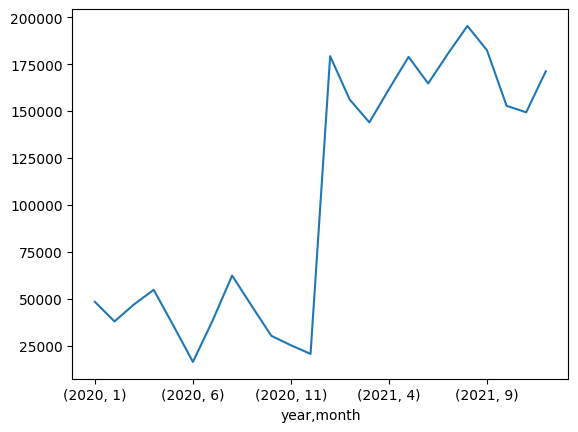

In [ ]:
adidas.groupby(['year', 'month'])['Units Sold'].sum().plot.line()

In [ ]:
adidas.pivot_table(index='year', columns='month', values='Units Sold', aggfunc='sum')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2020,48333.0,37846.0,46972.0,54709.0,35705.0,16269.0,38219.0,62307.0,46125.0,30167.0,25152.0,20545.0
2021,179299.0,156113.0,143988.0,161717.0,178900.0,164745.0,180481.0,195414.0,182425.0,152834.0,149350.0,171246.0


Amazon, Kohl's 는 21년도 부터 판매 시작한 것으로 보이고

Foot Locker, Sports Direct, Walmart 등 20년에는 판매 안한 월이 뜸뜸히 있음

21년부터는 모든 업체 매월 판매

In [ ]:
adidas.pivot_table(index=['year', 'month'], columns='Retailer', values='Units Sold', aggfunc='sum')

Retailer     Amazon  Foot Locker   Kohl's  Sports Direct  Walmart  West Gear
year month                                                                  
2020 1          NaN      30275.0      NaN            NaN      NaN    18058.0
     2          NaN      14712.0      NaN            NaN      NaN    23134.0
     3          NaN      27650.0      NaN            NaN      NaN    19322.0
     4          NaN       2216.0      NaN            NaN  22146.0    30347.0
     5          NaN       2071.0      NaN         4584.0  10950.0    18100.0
     6          NaN          NaN      NaN            NaN      NaN    16269.0
     7          NaN          NaN      NaN        15198.0   1630.0    21391.0
     8          NaN      17796.0      NaN        10337.0  29676.0     4498.0
     9          NaN       5625.0      NaN         6203.0  19619.0    14678.0
     10         NaN       4446.0      NaN         9944.0  15777.0        NaN
     11         NaN       8193.0      NaN            NaN      NaN    16959.0
     12         NaN       7320.0   2214.0            NaN      NaN    11011.0
2021 1      13006.0      40384.0  29841.0        28070.0      NaN    67998.0
     2      14609.0      36526.0  32766.0        25159.0   1617.0    45436.0
     3      13204.0      31078.0  31904.0        38838.0   3409.0    25555.0
     4      12548.0      26734.0  37976.0        49526.0   6784.0    28149.0
     5      15489.0      35513.0  47726.0        38996.0   8007.0    33169.0
     6      17917.0      56632.0  15116.0        23859.0  10949.0    40272.0
     7      19510.0      59350.0  16403.0        27413.0  16342.0    41463.0
     8      18014.0      41453.0  15675.0        70385.0  17343.0    32544.0
     9      14879.0      24116.0  13671.0        90087.0  15359.0    24313.0
     10     17767.0      28945.0  12409.0        56195.0  13204.0    24314.0
     11     20456.0      43742.0  14765.0        30090.0   9090.0    31207.0
     12     20591.0      59592.0  16909.0        32756.0   4323.0    37075.0

<Axes: xlabel='year,month'>

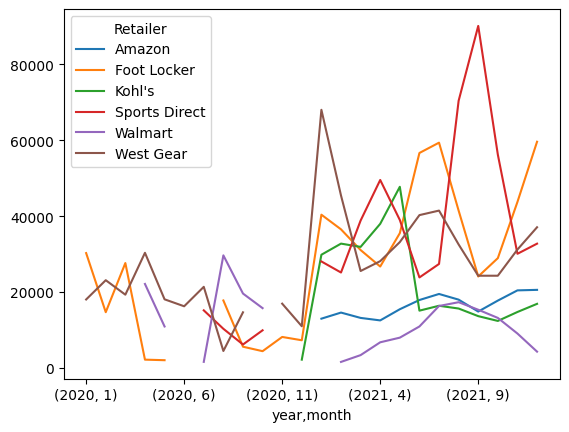

In [ ]:
adidas.pivot_table(index=['year', 'month'], columns='Retailer', values='Units Sold', aggfunc='sum').plot.line()

소매브랜드 안에도 ID가 여러개 있음 (해당 소매점 브랜드의 점포ID 같음)

아마존 제외하면 2개이상 됨.

In [ ]:
adidas[['Retailer', 'Retailer ID']].drop_duplicates().sort_values('Retailer')

,Retailer,Retailer ID
1148,Amazon,1185732
2007,Foot Locker,1197831
1287,Foot Locker,1128299
0,Foot Locker,1185732
212,Kohl's,1189833
2147,Kohl's,1128299
1499,Kohl's,1185732
2786,Kohl's,1197831
766,Sports Direct,1185732
68,Sports Direct,1197831


매장이 20년에 비해 21년에 늘어난 걸까?

월별 상점의 갯수(Retailer ID) 알아보자!

In [ ]:
df = adidas[['Retailer', 'Retailer ID', 'year', 'month']].drop_duplicates().sort_values(['Retailer', 'month'])

df.pivot_table(index=['year', 'month'], values='Retailer ID', aggfunc='count')

Retailer ID
year month             
2020 1                2
     2                2
     3                2
     4                4
     5                4
     6                1
     7                3
     8                5
     9                4
     10               3
     11               2
     12               3
2021 1               14
     2               15
     3               15
     4               15
     5               15
     6               13
     7               15
     8               16
     9               15
     10              16
     11              14
     12              13

<Axes: xlabel='year,month'>

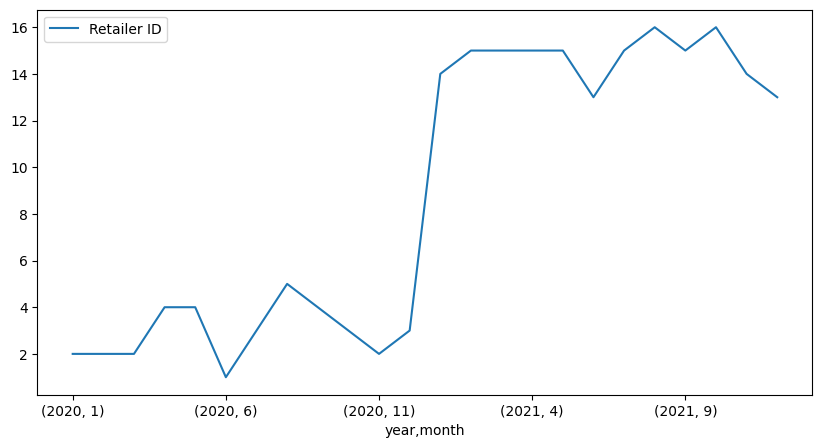

In [ ]:
df.pivot_table(index=['year', 'month'], values='Retailer ID', aggfunc='count').plot(kind='line', figsize=(10,5))

In [ ]:
df.pivot_table(index=['year', 'month'], columns='Retailer', values='Retailer ID', aggfunc='count')

Retailer    Amazon  Foot Locker  Kohl's  Sports Direct  Walmart  West Gear
year month                                                                
2020 1         NaN          1.0     NaN            NaN      NaN        1.0
     2         NaN          1.0     NaN            NaN      NaN        1.0
     3         NaN          1.0     NaN            NaN      NaN        1.0
     4         NaN          1.0     NaN            NaN      1.0        2.0
     5         NaN          1.0     NaN            1.0      1.0        1.0
     6         NaN          NaN     NaN            NaN      NaN        1.0
     7         NaN          NaN     NaN            1.0      1.0        1.0
     8         NaN          1.0     NaN            1.0      1.0        2.0
     9         NaN          1.0     NaN            1.0      1.0        1.0
     10        NaN          1.0     NaN            1.0      1.0        NaN
     11        NaN          1.0     NaN            NaN      NaN        1.0
     12        NaN          1.0     1.0            NaN      NaN        1.0
2021 1         1.0          3.0     4.0            3.0      NaN        3.0
     2         1.0          3.0     4.0            3.0      1.0        3.0
     3         1.0          3.0     4.0            3.0      1.0        3.0
     4         1.0          2.0     4.0            3.0      2.0        3.0
     5         1.0          2.0     4.0            3.0      2.0        3.0
     6         1.0          2.0     3.0            2.0      2.0        3.0
     7         1.0          3.0     3.0            2.0      3.0        3.0
     8         1.0          3.0     3.0            3.0      3.0        3.0
     9         1.0          2.0     3.0            3.0      3.0        3.0
     10        1.0          3.0     3.0            3.0      3.0        3.0
     11        1.0          3.0     3.0            3.0      1.0        3.0
     12        1.0          3.0     3.0            2.0      1.0        3.0

<Axes: xlabel='year,month'>

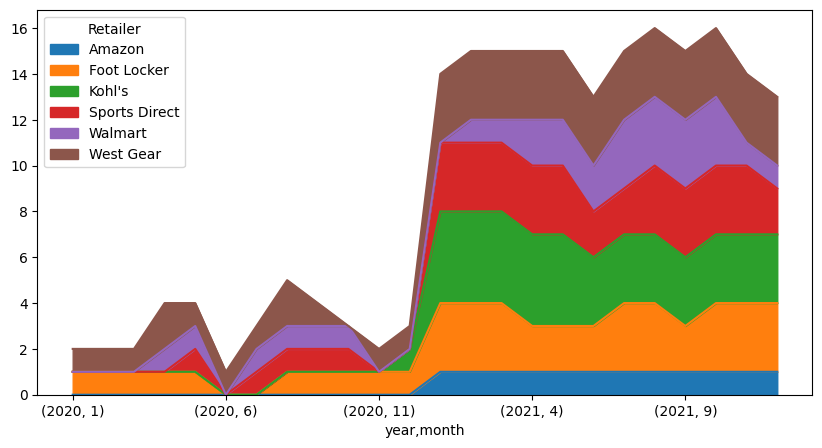

In [ ]:
df.pivot_table(index=['year', 'month'], columns='Retailer', values='Retailer ID', aggfunc='count').plot(kind='area', figsize=(10,5))

20년에 비해 21년 매장 수가 급격하게 늘어났다. 이 부분은 외부 데이터나 외부 요인을 통해 알아봐야한다.

예상해보자면 20년도 까지 코로나 여파가 있었다.

# 2

In [ ]:
adidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Operating Margin rate,year,month
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50.0,In-store,0.50,2020,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,30.0,In-store,0.30,2020,1
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,35.0,In-store,0.35,2020,1
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,35.0,In-store,0.35,2020,1
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,30.0,In-store,0.30,2020,1


## 마진율 분석

In [ ]:
adidas.groupby('year').agg({'Operating Margin rate' : 'mean'})

,Operating Margin rate
year,
2020,0.403733
2021,0.425996


<Axes: xlabel='year,month'>

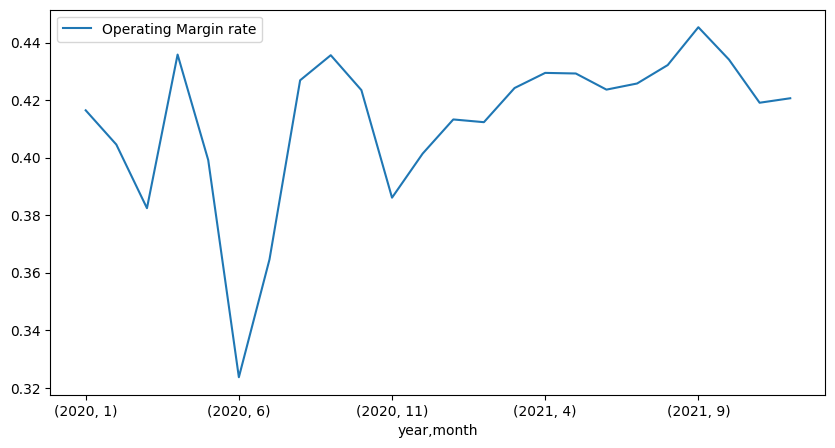

In [ ]:
adidas.pivot_table(index=['year', 'month'], values='Operating Margin rate', aggfunc='mean').plot(kind='line', figsize=(10,5))

<Axes: xlabel='year,month'>

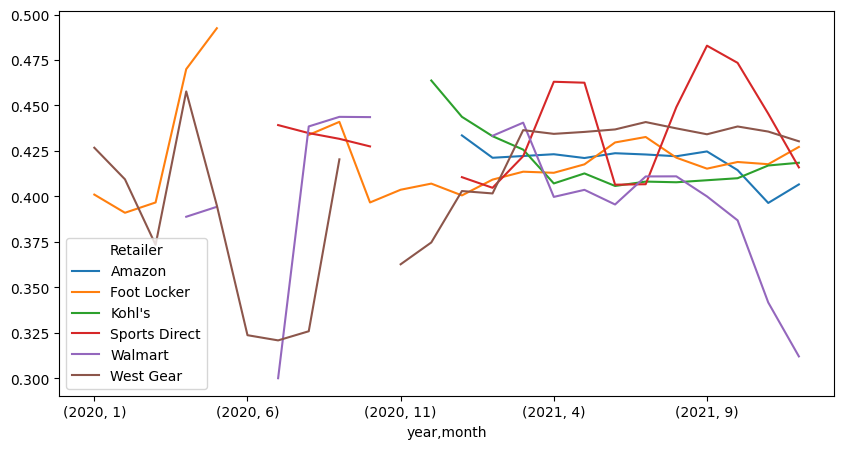

In [ ]:
adidas.pivot_table(index=['year', 'month'], columns='Retailer', values='Operating Margin rate', aggfunc='mean').plot(kind='line', figsize=(10,5))

## 판매방법에 따른 마진율/판매단가

In [ ]:
adidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Operating Margin rate,year,month
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50.0,In-store,0.50,2020,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,30.0,In-store,0.30,2020,1
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,35.0,In-store,0.35,2020,1
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,35.0,In-store,0.35,2020,1
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,30.0,In-store,0.30,2020,1


<Axes: xlabel='year,month'>

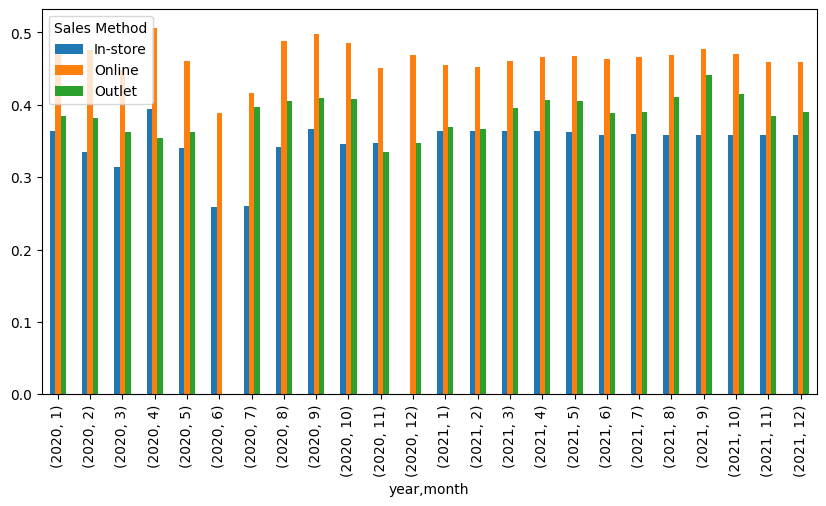

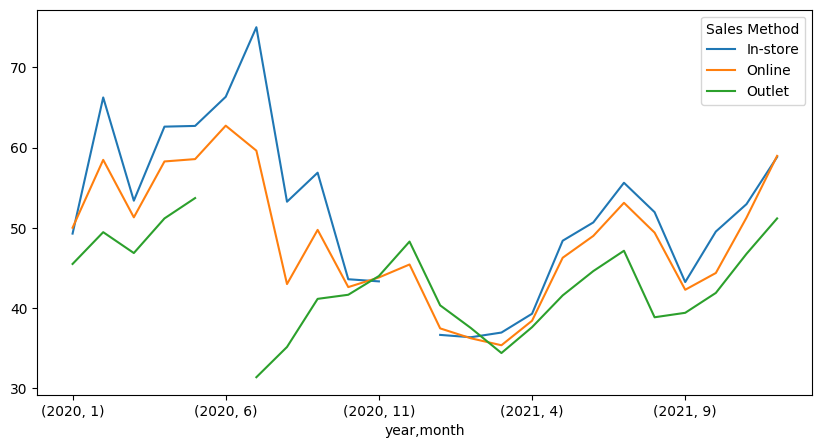

In [ ]:
adidas.pivot_table(index=['year', 'month'], columns='Sales Method', values='Operating Margin rate', aggfunc='mean').plot(kind='bar', figsize=(10,5))
adidas.pivot_table(index=['year', 'month'], columns='Sales Method', values='Price per Unit', aggfunc='mean').plot(kind='line', figsize=(10,5))

## 판매방법에 따라 판매성과에 차이가 있을까? (분산 분석)

- 일원배치 분산분석(ANOVA)를 이용한 통계적 검증
- 세 개 이상의 집단이 하나의 변수로 인해 차이가 나는지 검증하는 분석방법
- 최소자승법(OLS)를 이용하여 검증할 수 있음

<Axes: title={'center': 'Price per Unit'}, xlabel='[Sales Method]'>

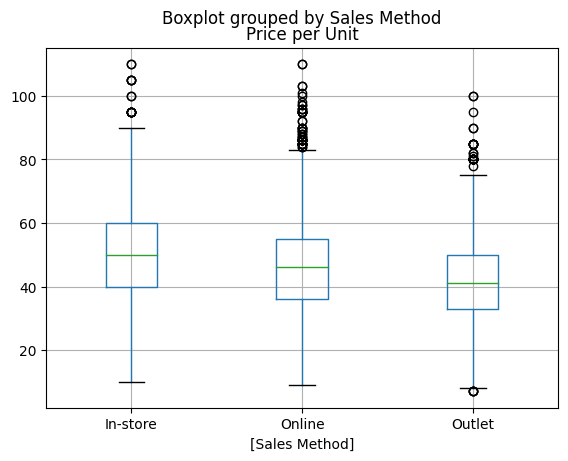

In [ ]:
adidas[['Sales Method', 'Price per Unit']].boxplot(by='Sales Method')

<Axes: title={'center': 'Operating Margin'}, xlabel='[Sales Method]'>

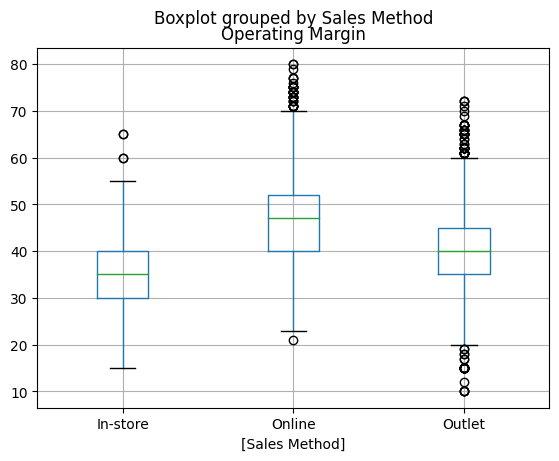

In [ ]:
adidas[['Sales Method', 'Operating Margin']].boxplot(by='Sales Method')

ANOVA 분석

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [ ]:
def anova_analysis(x, y):
  # x : 비교그룹
  # y : 비교할 변수
  df = adidas[[x, y]]

  # 띄어쓰기는 statsmodels ols 함수가 인식 못함
  x = x.replace(' ', '_')
  y = y.replace(' ', '_')

  df.columns = [x, y]

  # 영업이익 ~ C(Sales_Method)   / C : 카테고리 변수 라는 의미
  # Sales_Method에 따라서 영업이익이 어떻게 변하는지 검증
  # 원핫인코딩 형태로
  model = ols(f'{y} ~ C({x})', df).fit()

  anova_tb = anova_lm(model)
  print(anova_tb)

  if anova_tb.iloc[0, 4] < 0.05:
    print(f'판매방법에 따른 {y} 이(가) 차이가 있습니다.')
  else:
    print(f'판매방법에 따른 {y} 이(가) 차이가 나지 않습니다.')

유의확률 < 0.05 -> 귀무가설 기각

귀무가설 (H0) : Sales Method에 따른 영업이익에 차이는 없다

대립가설 (H1) : Sales Method에 따른 영업이익에 유의미한 차이가 있다.

In [ ]:
x = 'Sales Method'
y1 = 'Price per Unit'
y2 = 'Operating Margin rate'

print('* 판매가격의 차이 검증')
anova_analysis(x, y1)
print('\r\n\r\n')
print('=======================================')
print('\r\n\r\n')
print('* 마진율의 차이 검증')
anova_analysis(x, y2)


* 판매가격의 차이 검증
                     df        sum_sq       mean_sq           F        PR(>F)
C(Sales_Method)     2.0  5.550261e+04  27751.304281  131.810754  3.339384e-57
Residual         9645.0  2.030649e+06    210.538999         NaN           NaN
판매방법에 따른 Price_per_Unit 이(가) 차이가 있습니다.






* 마진율의 차이 검증
                     df     sum_sq   mean_sq            F  PR(>F)
C(Sales_Method)     2.0  18.450217  9.225109  1224.079115     0.0
Residual         9645.0  72.688254  0.007536          NaN     NaN
판매방법에 따른 Operating_Margin_rate 이(가) 차이가 있습니다.


=> 판매방법에 따라 단가 차이가 있다. In-Store > On-line > Outlet

=> 즉, 매장 방법 손님의 객단가가 가장 높고, 다음으로 온라인, 아울렛 순 - 할인율과는 관계 X

=> 아울렛은 매장, 온라인에서 판매되지 않는 상품이 판매되기 때문에 인사이트 분석을 위한 비교대상으로 보기 어려움

=> 판매방법에 따라 마진율(이익율) 차이가 있다. On-line > Outlet > In-Store

<br>

** 분석결과

=> 온라인 : 단가가 낮은 상품이 많이 팔리고, 마진율이 높음

=> 매장 : 단가 높은 상품이 많이 팔리고, 마진율이 낮음

온오프라인 판매전략 수립에 활용

리테일 사업 고려하는 인원들에게?

